In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau = 0.00000000005
L = 0.20
#tau = 0.000000000003
#L = 0.05
N = 61
h = L/(N-1)
D = 1.0E05
C = 1.0E08
coeff = D*tau/(h*h)
coeff2 = C*tau

print ("Need coeff < 0.5 for stability!!!")
print ("coeff = ",coeff)

Need coeff < 0.5 for stability!!!
coeff =  0.44999999999999996


In [3]:
#
# Initial conditions ... temperature is zero everywhere, except for a delta function at the center
#
nn = np.zeros(N)
nn_new = np.zeros(N)
nn[int(N/2)] = 1.0/h

In [4]:
xplot = np.arange(N)*h-L/2.0
iplot = 0
nstep = 10*N
nplots = int(N/2)
plot_step = nstep/nplots

In [5]:
nnplot = np.empty((N,nplots))
tplot = np.empty(nplots)
nAve = np.empty(nplots)

for istep in range(nstep):
    nn[1:(N-1)] = ( nn[1:(N-1)] + coeff*( nn[2:N] + nn[0:(N-2)] - 2*nn[1:(N-1)] ) + coeff2*nn[1:(N-1)] )
    
    if (istep+1) % plot_step < 1:
        nnplot[:,iplot] = np.copy(nn)
        tplot[iplot] = (istep+1)*tau
        nAve[iplot] = np.mean(nn)
        iplot += 1
        print ('Finished ',istep,' of ',nstep,' steps.')

Finished  20  of  610  steps.
Finished  40  of  610  steps.
Finished  60  of  610  steps.
Finished  81  of  610  steps.
Finished  101  of  610  steps.
Finished  121  of  610  steps.
Finished  142  of  610  steps.
Finished  162  of  610  steps.
Finished  182  of  610  steps.
Finished  203  of  610  steps.
Finished  223  of  610  steps.
Finished  243  of  610  steps.
Finished  264  of  610  steps.
Finished  284  of  610  steps.
Finished  304  of  610  steps.
Finished  325  of  610  steps.
Finished  345  of  610  steps.
Finished  365  of  610  steps.
Finished  386  of  610  steps.
Finished  406  of  610  steps.
Finished  426  of  610  steps.
Finished  447  of  610  steps.
Finished  467  of  610  steps.
Finished  487  of  610  steps.
Finished  508  of  610  steps.
Finished  528  of  610  steps.
Finished  548  of  610  steps.
Finished  569  of  610  steps.
Finished  589  of  610  steps.
Finished  609  of  610  steps.


In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

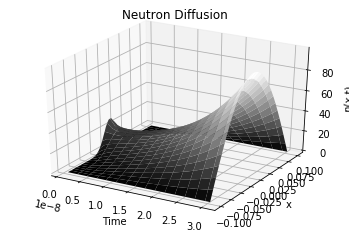

In [7]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot,xplot)
ax.plot_surface(Tp,Xp,nnplot,rstride=2,cstride=2,cmap=cm.gray)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('n(x,t)')
ax.set_title('Neutron Diffusion')
plt.show()

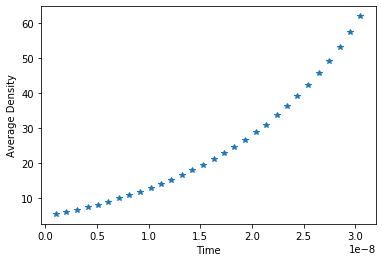

In [8]:
plt.plot(tplot,nAve,'*')
plt.xlabel('Time')
plt.ylabel('Average Density')
plt.show()

0.05148262398252918
0.07810249675906655


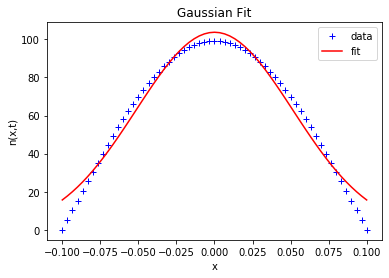

In [9]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import math

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

x = ar(xplot)
y = ar(nn)

popt,pcov = curve_fit(gaus,x,y,p0=[3.0,0.0,0.5])

print(abs(popt[2]))
sigma_expected = math.sqrt(2.0*D*nstep*tau)
print(sigma_expected)

plt.plot(x,y,'b+',label='data')
plt.plot(x,gaus(x,*popt),'r-',label='fit')
plt.legend()
plt.title('Gaussian Fit')
plt.xlabel('x')
plt.ylabel('n(x,t)')
plt.show()